# ANALISI DATI ESERCIZI 8.1/2

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In questo esercizio ho calcolato l'energia di una particella in una buca di potenziale di equazione $V(x) = x^4 - \frac{5}{2}x^2$. 

Per fare ciò ho dovuto calcolare il seguente integrale  $$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

dove $|\Psi_T(x)|$ rappresenta la funzione d'onda della particella, di equazione: $$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Quindi per campionare $|\Psi_T(x)|^2$ ho utilizzato l'algoritmo di Metropolis con u passo di $2$ per avere un accettanza pari circa al 50%. 

Prima di fare ciò però ho cercato però i parametri $\sigma$ e $\mu$ che minimizzassero l'energia del sistema. I parametri li ho trovati utilizzando una doppia "Grid Search" e sono arrivato ai seguenti parametri $\sigma=0.62$ e $\mu=0.85$.

Ottenuti i parametri ottimali ho cominciato le simulazioni, ho eseguito $M=10^5$ simulazioni ed una media a blocchi con $N=100$ blocchi.

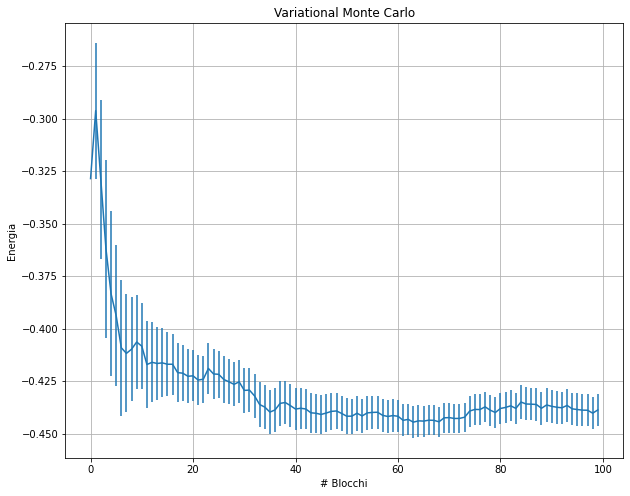

In [39]:
energy=np.loadtxt("Esercizio8_1/energy.txt")
plt.figure(figsize=(10,8))

#I have plotted a function of number of throws, not blocks
n=np.arange(100)
plt.errorbar(n,energy[:,0],yerr=energy[:,1])

plt.grid(True)
plt.xlabel("# Blocchi")
plt.ylabel("Energia" )
plt.title("Variational Monte Carlo")
plt.show()

In grafico i risultati delle mie simulazioni Monte Carlo per il calcolo dell'energia della particella.

In [61]:
#FORMULA TEORICA
import scipy.integrate as integrate

def psi_theo(x):
    mu = 0.85
    sigma = 0.62
    return np.exp(-pow((x - mu)/(sigma),2)/2) + np.exp (-pow((x+mu)/(sigma),2)/2)

def psi2_theo(x):
    return psi_theo(x)**2

norm, inc = integrate.quad(psi2_theo, -2.5,2.5)
norm = np.sqrt(norm)
print ('Normalizzazione della psi teorica vale %.2f' % norm )

Normalizzazione della psi teorica vale 1.59


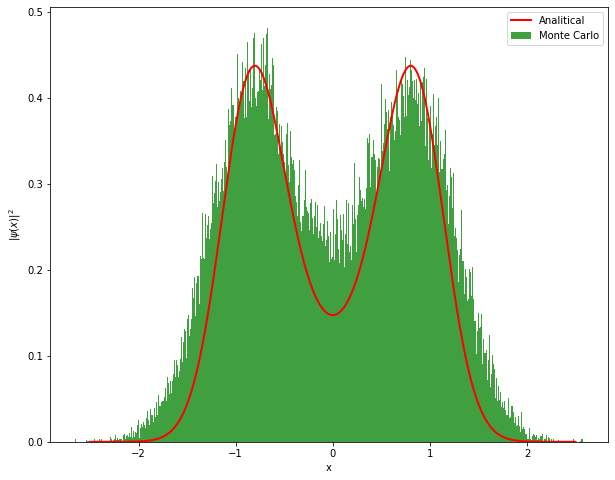

In [62]:


psi= np.loadtxt("Esercizio8_1/psi.txt",)
plt.figure(figsize=(10,8))
x=np.linspace(-2.5,2.5,1000)
plt.hist(psi, 500, density=True,facecolor='g', alpha=0.75, label="Monte Carlo")
plt.plot(x, (psi2_theo(x)/norm)**2,color="red",lw=2,label="Analitical");
plt.legend()
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
plt.show()

In questo grafico un istogramma della funzione d'onda della particella.

## Esercizio 8.3

In questa seconda parte invece ho ripetuto lo stesso calcolo della prima parte utilizzando però il codice PIGS. Ho testato il codice sia con una funziona d'onda costante $|\Psi(x)|=1$ sia con la stessa dell'esercizio precedente. Ho modificato il codice fornito aggiungendo il potenziale della buca e le sue derivate, inserendo la funzione d'onda con i parametri ottimizzati trovati prima e le sue derivate. Dopo di che ho provato anche a far variare la parte temporale immaginaria

In [72]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
psi_teo=psi

In [73]:
psi_gs=np.loadtxt("QMC_1D/GS_psi/probability.dat")
constant_gs=np.loadtxt("QMC_1D/constant_psi/probability.dat")

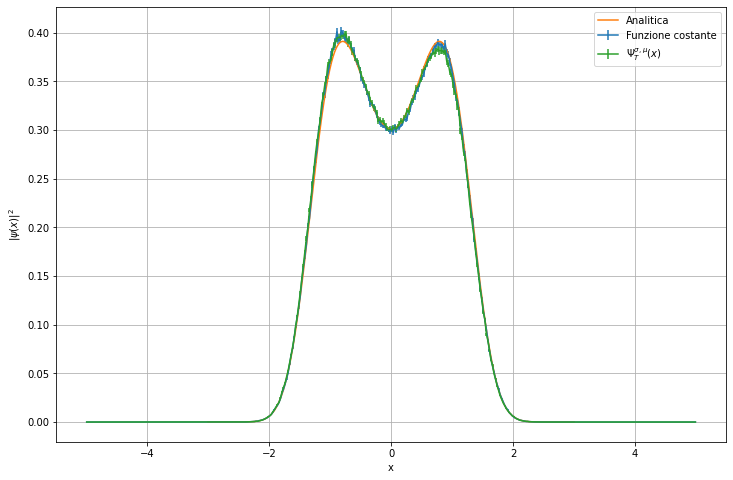

In [74]:
plt.figure(figsize=(12,8));
plt.errorbar(constant_gs[:,0],constant_gs[:,1], yerr=constant_gs[:,2], label='Funzione costante');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analitica")
plt.errorbar(psi_gs[:,0], psi_gs[:,1], yerr=psi_gs[:,2], label="$\Psi_T^{\sigma,\mu}(x)$");
plt.legend();

In grafico i risultati del codice PIGS sia con la funzione d'onda costante che con la funzione d'onda $\Psi_T^{\sigma,\mu}(x)$, usata nell'esercizio precedente. Si nota come anche per la funzione d'onda costante la forma della distribuzione rimane la medesima.

## Immaginary time reduction

In [75]:
TR_psi=np.loadtxt("QMC_1D/TR_psi/probability.dat")

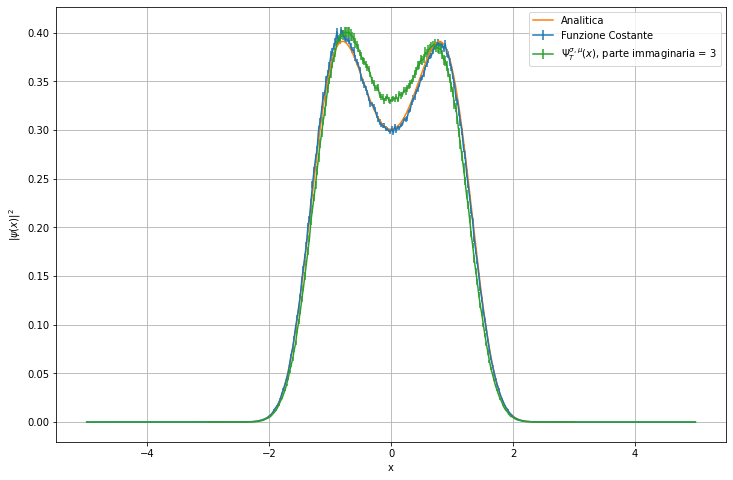

In [76]:
plt.figure(figsize=(12,8));
plt.errorbar(constant_gs[:,0],constant_gs[:,1], yerr=constant_gs[:,2], label='Funzione Costante');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analitica")
plt.errorbar(TR_psi[:,0], TR_psi[:,1], yerr=TR_psi[:,2], label="$\Psi_T^{\sigma,\mu}(x)$, parte immaginaria = 3");
plt.legend();

In questo grafico mostro i risultati ottenuti cambiando la parte immaginaria per la funzione d'onda $\Psi_T^{\sigma,\mu}(x)$. Fino ad un valore 3 della parte immaginaria la forma della distribuzione rimane simile a quella analitica, per valori minori ciò non è più vero.

### PIMC T>0

In quest'ultima parte utilizzo sempre lo stesso codice ma faccio variare la temperatura del sistema.

In [77]:
psi_pimc=np.loadtxt("QMC_1D/Pimc_psi/probability.dat")
psi_pimc10=np.loadtxt("QMC_1D/Pimc_psi/probability_10.dat")

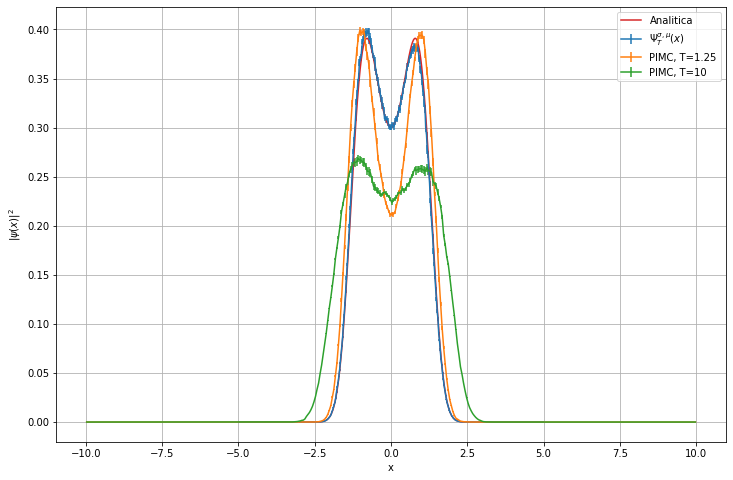

In [78]:
plt.figure(figsize=(12,8));
plt.errorbar(psi_gs[:,0], psi_gs[:,1], yerr=psi_gs[:,2], label="$\Psi_T^{\sigma,\mu}(x)$");
plt.errorbar(psi_pimc[:,0], psi_pimc[:,1], yerr=psi_pimc[:,2], label='PIMC, T=1.25');
plt.errorbar(psi_pimc10[:,0], psi_pimc10[:,1], yerr=psi_pimc[:,2], label='PIMC, T=10');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analitica")
plt.legend();

Il confronto tra la funzione d'onda campionata con PIMC, quella teorica e quella con PIGS mostra come ci sia un peggioramento quando la temperatura diventa diversa da 0.